<a href="https://colab.research.google.com/github/Marei33/xAutoML/blob/main/xAutoML_2022_Evaluation_ML__Models_Marei_Freitag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Please make a duplicate(**File-> Save a copy in Drive**) of this notebook in colab and 
rename it (xAutoML_2022_Evaluation_ML_ Models_firstname_lastname.ipynb).

### What is Google Colab?
If you are not familar with Colab, please check following links:


*   https://colab.research.google.com/notebooks/intro.ipynb
*   https://www.youtube.com/watch?v=inN8seMm7UI



# Session objectives




*   Get familiar with  statistical hypothesis tests.
*   Understanding when statistical hypothesis tests are required.


# Setup

In [49]:
import pandas as pd 
import numpy as np
from scipy import stats

# visualization packages 
import matplotlib.pyplot as plt
import seaborn as sns
# import urllib.request
import requests

# from sklearn 
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# for ignoring the warnings massages.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Homework requirements

1. Read and understand all cells - 0 points
2. Implement the missing cell indicated by the two tags: [start here] and [end here] - 2 point
3. Implement MCNemar test following the instructions in the corresponding cells - 1 point
4. Using 5 cross-validation splits, evaluate the whole dataset using the two classifiers - 2 points
5. Repeat the tests and check if there is a significant difference between classifiers 1 point

**P.S: for some of the above tasks, you may need to add more cells. please Add all extra cells at the end of the notebook.**

# Data collection 
The initial stage in any machine learning process might be data gathering. As an example, we will use a bank marketing dataset. kindly,run the following cell to get the dataset.

In [50]:
# downloading data source: https://datahub.io/machine-learning/bank-marketing/r/bank-marketing.csv
# Also If you want to know more about the data, please check this link (https://datahub.io/machine-learning/bank-marketing)
req = requests.get("https://datahub.io/machine-learning/bank-marketing/r/bank-marketing.csv")

url_content = req.content
csv_file = open('bank_marketing.csv', 'wb')
csv_file.write(url_content)
csv_file.close()
bank_marketing_df=pd.read_csv("./bank_marketing.csv")

# EDA (Exploratory Data Analysis)
We'd like to do some EDA in this section to learn more about the dataset.

In [51]:
# let's know some info about dataframe.
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      45211 non-null  int64 
 1   V2      45211 non-null  object
 2   V3      45211 non-null  object
 3   V4      45211 non-null  object
 4   V5      45211 non-null  object
 5   V6      45211 non-null  int64 
 6   V7      45211 non-null  object
 7   V8      45211 non-null  object
 8   V9      45211 non-null  object
 9   V10     45211 non-null  int64 
 10  V11     45211 non-null  object
 11  V12     45211 non-null  int64 
 12  V13     45211 non-null  int64 
 13  V14     45211 non-null  int64 
 14  V15     45211 non-null  int64 
 15  V16     45211 non-null  object
 16  Class   45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [52]:
# we can chane the column names based on the source (https://datahub.io/machine-learning/bank-marketing)
bank_marketing_df.columns=['age','job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact','day', 'month','duration','campaign','pdays','previous', 'poutcome', 'class']

In [53]:
# displaying a ranom sample of the dataset
bank_marketing_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
27179,54,management,married,tertiary,no,203,no,no,cellular,21,nov,70,1,-1,0,unknown,1
29054,34,blue-collar,single,secondary,no,186,no,no,cellular,2,feb,342,1,-1,0,unknown,1
4389,33,admin.,married,secondary,no,730,yes,no,unknown,20,may,70,1,-1,0,unknown,1
17756,59,services,married,primary,no,4295,no,no,telephone,29,jul,129,3,-1,0,unknown,1
36036,60,admin.,married,secondary,no,-396,yes,no,cellular,11,may,443,1,350,1,failure,1
36603,31,blue-collar,married,primary,no,63,yes,no,cellular,12,may,256,1,-1,0,unknown,1
29405,42,services,married,primary,no,124,yes,no,cellular,2,feb,164,2,262,2,failure,1
36657,53,management,married,secondary,no,218,yes,no,cellular,12,may,27,6,344,12,failure,1
1368,31,blue-collar,married,secondary,no,335,yes,no,unknown,8,may,226,1,-1,0,unknown,1
1775,56,admin.,married,primary,no,202,yes,no,unknown,9,may,178,2,-1,0,unknown,1


In [54]:
# By using describe function we can get some insights about the dataset. for example, the minimum age is 18 which makes sense for a bank account.
bank_marketing_df.describe()

,age,balance,day,duration,campaign,pdays,previous,class
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


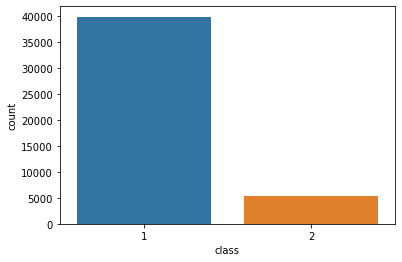

In [55]:
#let's check the target variable
# Did a client subscribed a term deposit? NO is 1 and Yes 2 in the dataset!
# use the countplot function from sns to plot the 'class' column from the dataset
#[start here]
sns.countplot(bank_marketing_df["class"])
plt.show()
#[end here]

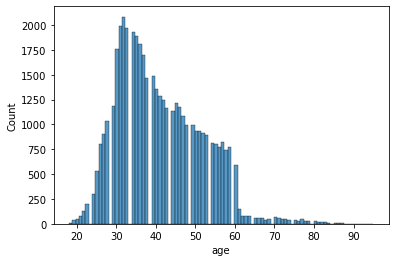

In [56]:
# What about the age distribution in the dataset?
# use the distplot function from sns to plot a histrogram for the 'age' column from the dataset
#[start here]
sns.histplot(bank_marketing_df.age)
plt.show()
#[end here]

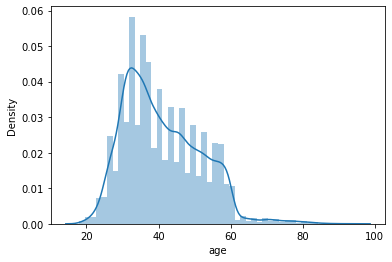

In [57]:
sns.distplot(bank_marketing_df.age)
plt.show()

# Preprocessing 

In [58]:
categorical_cloumns = list(bank_marketing_df.select_dtypes(include=['object']).columns)
categorical_cloumns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [59]:
# use the LabelEncoder from scikit-learn to encode the categorical features
#[start here]
le = LabelEncoder()
for col in categorical_cloumns:
  bank_marketing_df[col] = le.fit_transform(bank_marketing_df[col])
  #[end here]
bank_marketing_df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,2
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,2
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,1
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,1


# Fit the Models: Random Forest & Logistic regression
in this section we would like to apply two ML algorithm on the dataset and gather the result for further statistical analysis.

In [60]:
y=bank_marketing_df['class']
X=bank_marketing_df.drop('class',1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 2021)

In [61]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [62]:
rf_model = RandomForestClassifier(random_state=2021).fit(X_train, y_train)
log_model = LogisticRegression(random_state=2021).fit(X_train, y_train)

In [63]:
y_pred_rf = rf_model.predict(X_test)
y_pred_log = log_model.predict(X_test)

##  roc_auc score 

In [64]:
# y_test=y_test.to_numpy()
auc_score_rf=roc_auc_score(y_test,y_pred_rf)
print("roc_auc score for random forest model ",auc_score_rf )
auc_score_log=roc_auc_score(y_test,y_pred_log)
print("roc_auc score for decision tree model ",auc_score_log )

roc_auc score for random forest model  0.6925005266693388
roc_auc score for decision tree model  0.6069697500224512


# Tests overveiw

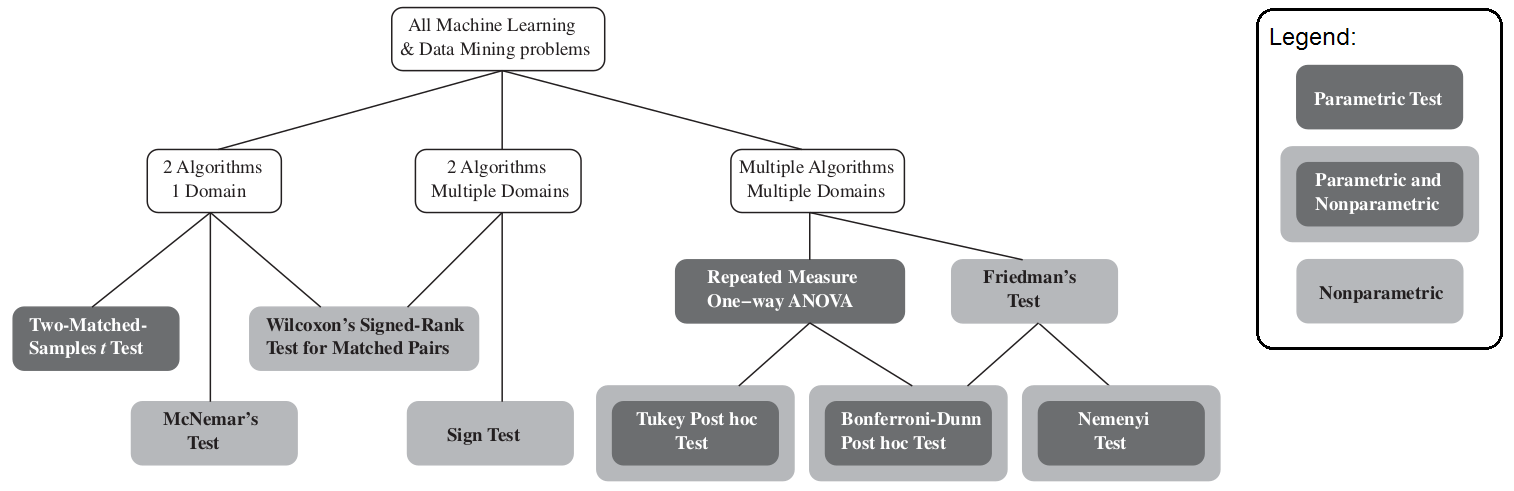

## Create a new data frame

In [65]:
mc_data=pd.DataFrame()
mc_data["ground_truth"]=y_test.tolist()
mc_data["y_pred_log"]=y_pred_log.tolist()
mc_data["y_pred_rf"]=y_pred_rf.tolist()

# McNemar Test 
To this point, we have trained two models on bank marketing dataset and saved all results on a dataframe(mc_data). The first column represents the ground truth and the 2nd and the 3rd columns represent the output from decision tree and random forest respectively.  



In [66]:
# check 5 random row
mc_data.head(5)

,ground_truth,y_pred_log,y_pred_rf
0,1,2,2
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


Now we want to see if the outcomes of the models are significantly different using McNemar Test. Therefore, Please Implement a McNemer Test to determine whether the two models perform equally well on the dataset. In your solution state what is H0,H1 and return χ2  for this evaluation. 

## Contingency Table

In [67]:
# mc_data['dt_correct']=['yes' if mc_data['ground_truth']== mc_data['y_pred_log']: else "No"] 
mc_data.loc[mc_data['ground_truth']==mc_data['y_pred_log'],'correct_log']="Yes"
mc_data.loc[mc_data['ground_truth']==mc_data['y_pred_rf'],'correct_rf']="Yes"
mc_data.loc[mc_data['ground_truth']!=mc_data['y_pred_log'],'correct_log']="No"
mc_data.loc[mc_data['ground_truth']!=mc_data['y_pred_rf'],'correct_rf']="No"
mc_data.head(5)

,ground_truth,y_pred_log,y_pred_rf,correct_log,correct_rf
0,1,2,2,No,No
1,1,1,1,Yes,Yes
2,1,1,1,Yes,Yes
3,1,1,1,Yes,Yes
4,1,1,1,Yes,Yes


In [68]:

contingency_table_df=pd.DataFrame(data={"nr_correct_log":["Yes/Yes","No/Yes"], "nr_incorrect_log":["Yes/No","No/No"]}, index=["nr_correct_rf","nr_incorrect_rf"])
contingency_table_df

,nr_correct_log,nr_incorrect_log
nr_correct_rf,Yes/Yes,Yes/No
nr_incorrect_rf,No/Yes,No/No


In [69]:
nr_corr_rf_corr_log=0
nr_corr_rf_incorr_log=0
nr_incorr_rf_corr_log=0
nr_incorr_rf_incorr_log=0
for index, row in mc_data.iterrows():
    if  row['correct_rf']== "Yes" and  row['correct_log']=="Yes":
      nr_corr_rf_corr_log+=1
    elif row['correct_rf']== "Yes" and  row['correct_log']=="No":
      nr_corr_rf_incorr_log+=1
    elif row['correct_rf']== "No" and  row['correct_log']=="Yes":
      nr_incorr_rf_corr_log+=1
    elif row['correct_rf']== "No" and  row['correct_log']=="No":
      nr_incorr_rf_incorr_log+=1

nr_corr_rf_corr_log
nr_corr_rf_incorr_log
nr_incorr_rf_corr_log
nr_incorr_rf_incorr_log



1059

In [70]:
contingency_table_df.iloc[0,0]=nr_corr_rf_corr_log
contingency_table_df.iloc[0,1]=nr_corr_rf_incorr_log
contingency_table_df.iloc[1,0]=nr_incorr_rf_corr_log
contingency_table_df.iloc[1,1]=nr_incorr_rf_incorr_log
contingency_table_df

,nr_correct_log,nr_incorrect_log
nr_correct_rf,12980,542
nr_incorrect_rf,339,1059


After calculating the Contingency Table, we need to define your hypothesis:


*   H0: on average, the random forest and the logistic regression perform the same
*   H1: on average, the random forest and the logistic regression do not perform the same

In [71]:
# write the formulla here 
#[start here] 
# chi2_Mc= (|B-C|-1)^2 / (B+C)
B = nr_corr_rf_incorr_log
C = nr_incorr_rf_corr_log

chi2_Mc = (np.abs(B-C)-1)**2/(B+C)

# [end here]
# print 
chi2_Mc  

46.315550510783204

In [72]:
from statsmodels.stats.contingency_tables import mcnemar
# define contingency table
contingency_table = [[12999, 525],
		 [317, 1079]]
# calculate mcnemar test
result = mcnemar(contingency_table, exact=False, correction=True)
# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
# interpret the p-value
alpha = 0.05
if result.pvalue > alpha:
	print('Same proportions of errors (fail to reject H0)')
else:
	print('Different proportions of errors (reject H0)')

statistic=50.890, p-value=0.000
Different proportions of errors (reject H0)


# Friedman Test
ftestdata.csv contains error values of k = 6 algorithms on n = 194 datasets, the function load data FTest() loads the data as an n × k numpy matrix Err, where Errij represents the error of the jth algorithm on the ith dataset. 
Implement a Friedman Test to determine if all algorithms are equivalent in their performance and return χ2F for this evaluation. If this hypothesis is not rejected, you can skip the next question. 

In [73]:
# you need to download the ftestdata.csv from the moodle
ftestdata=pd.read_csv("ftestdata.csv")
ftestdata

,id,AB,ET,RF,GB,DT,SVM
0,0,0.739690,0.725358,0.729163,0.738619,0.712951,0.698456
1,1,0.956144,0.954838,0.953255,0.956336,0.921329,0.953624
2,2,1.000000,1.000000,1.000000,1.000000,0.998264,1.000000
3,3,0.983333,0.983333,1.000000,1.000000,0.970000,0.911667
4,4,0.967753,0.949953,0.940336,0.960080,0.846515,0.907268
...,...,...,...,...,...,...,...
189,189,0.847922,0.842922,0.856212,0.846636,0.820545,0.809636
190,190,0.907143,0.932321,0.908571,0.927143,0.893571,0.880000
191,191,0.623775,0.638909,0.619158,0.631209,0.606822,0.624632
192,192,1.000000,1.000000,1.000000,1.000000,1.000000,0.728794


In [74]:
# Friedman test
from scipy.stats import friedmanchisquare
 
# Select data based on each classifier
AB = ftestdata["AB"]
ET = ftestdata["ET"]
RF = ftestdata["RF"]
GB = ftestdata["GB"]
DT = ftestdata["DT"]
SVM = ftestdata["SVM"]
# compare samples
stat, p = friedmanchisquare(AB, ET, RF,GB,DT,SVM)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=286.423, p=0.000
Different distributions (reject H0)


Methods: Ada Boost, ET, Random Forest, Decision Tree, Gradient Boosting, Support Vector Machine

# Post-hoc Nemenyi Test
Having found that all the algorithms are not ranked equally, now we need to utilize the Post-hoc Nemenyi Test to find the best-performing algorithm. 
Compute the the test statistic for all the algorithms pairs {j1,j2}. The results should be stored in a upper triangular matrix Q, where Qm,n is the q value between the algorithms jm and jn 

In [76]:
!pip install scikit-posthocs

The Nemeyi post-hoc test returns the p-values for each pairwise comparison of means. From the output we can see the following p-values:

In [77]:
import scikit_posthocs as sp
import numpy as np

#combine three groups into one array
data = np.array([AB, ET, RF, GB, DT, SVM])

#perform Nemenyi post-hoc test
posthoc_nemenyi_friedman_res = sp.posthoc_nemenyi_friedman(data.T)
posthoc_nemenyi_friedman_res

,0,1,2,3,4,5
0,1.000,0.001,0.001,0.900,0.001,0.001
1,0.001,1.000,0.900,0.001,0.001,0.001
2,0.001,0.900,1.000,0.001,0.001,0.001
3,0.900,0.001,0.001,1.000,0.001,0.001
4,0.001,0.001,0.001,0.001,1.000,0.900
5,0.001,0.001,0.001,0.001,0.900,1.000



### Visualization (optional) [0.5 points]
Rank the six algorithms showing the statistical difference among them

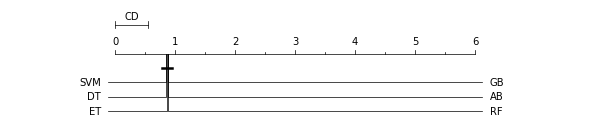

CD value: 0.5413125043511202


In [79]:
# [start here] 
# Your code goes here: Critical Distance Plot

import Orange
import matplotlib.pyplot as plt
names = ["AB", "ET", "RF", "GB", "DT", "SVM"]
avranks = np.array([AB.mean(), ET.mean(), RF.mean(), GB.mean(), DT.mean(), SVM.mean()]) 
# not sure, what values are needed to be computed for the 'avranks' argument
n_data = len(AB)
cd = Orange.evaluation.compute_CD(avranks, n=n_data, alpha='0.05', test="nemenyi")
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=8, textspace=1.5)

plt.show()
print('CD value:', cd)

# [end here]

# Task: evaluate the two classifiers using 5 cross-validation splits - 2 points.

In [80]:
# [start here]
# 5-fold cross validation

from sklearn.model_selection import KFold

auc_score_rf = []
auc_score_log = []

p_values = []

kf = KFold(n_splits=5, random_state=2021, shuffle=True)
for train, test in kf.split(bank_marketing_df):
    
    # split data
    y = np.array(bank_marketing_df['class'])
    X = np.array(bank_marketing_df.drop('class',1))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

    # preprocessing
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    ### fit models ###
    rf_model = RandomForestClassifier(random_state=2021).fit(X_train, y_train)
    log_model = LogisticRegression(random_state=2021).fit(X_train, y_train)

    y_pred_rf = rf_model.predict(X_test)
    y_pred_log = log_model.predict(X_test)

    auc_score_rf.append(roc_auc_score(y_test,y_pred_rf))
    auc_score_log.append(roc_auc_score(y_test,y_pred_log))


    ### McNemar Test ###
    mc_data=pd.DataFrame()
    mc_data["ground_truth"]=y_test.tolist()
    mc_data["y_pred_log"]=y_pred_log.tolist()
    mc_data["y_pred_rf"]=y_pred_rf.tolist()

    mc_data.loc[mc_data['ground_truth']==mc_data['y_pred_log'],'correct_log']="Yes"
    mc_data.loc[mc_data['ground_truth']==mc_data['y_pred_rf'],'correct_rf']="Yes"
    mc_data.loc[mc_data['ground_truth']!=mc_data['y_pred_log'],'correct_log']="No"
    mc_data.loc[mc_data['ground_truth']!=mc_data['y_pred_rf'],'correct_rf']="No"

    # create contingency table for the two models
    contingency_table_df = pd.DataFrame(data={"nr_correct_log":["Yes/Yes","No/Yes"], "nr_incorrect_log":["Yes/No","No/No"]}, index=["nr_correct_rf","nr_incorrect_rf"])

    nr_corr_rf_corr_log=0
    nr_corr_rf_incorr_log=0
    nr_incorr_rf_corr_log=0
    nr_incorr_rf_incorr_log=0
    for index, row in mc_data.iterrows():
        if  row['correct_rf']== "Yes" and  row['correct_log']=="Yes":
          nr_corr_rf_corr_log+=1
        elif row['correct_rf']== "Yes" and  row['correct_log']=="No":
          nr_corr_rf_incorr_log+=1
        elif row['correct_rf']== "No" and  row['correct_log']=="Yes":
          nr_incorr_rf_corr_log+=1
        elif row['correct_rf']== "No" and  row['correct_log']=="No":
          nr_incorr_rf_incorr_log+=1

    nr_corr_rf_corr_log
    nr_corr_rf_incorr_log
    nr_incorr_rf_corr_log
    nr_incorr_rf_incorr_log

    contingency_table_df.iloc[0,0] = nr_corr_rf_corr_log
    contingency_table_df.iloc[0,1] = nr_corr_rf_incorr_log
    contingency_table_df.iloc[1,0] = nr_incorr_rf_corr_log
    contingency_table_df.iloc[1,1] = nr_incorr_rf_incorr_log
    
    # calculate mcnemar test
    result = mcnemar(contingency_table_df, exact=False, correction=True)
    p_values.append(result.pvalue)

# calculate mean values for roc_auc score of the different folds
mean_auc_score_rf = np.array(auc_score_rf).mean()
mean_auc_score_log = np.array(auc_score_log).mean()

print(f"Mean roc_auc scores for random forest model: {mean_auc_score_rf},\nMean roc_auc scores for logistic regression model: {mean_auc_score_log}.")
print(f"Mean p-value for McNemar Test: {np.array(p_values).mean()}.")

# [end here]

Mean roc_auc scores for random forest model: 0.6953710698934874,
Mean roc_auc scores for logistic regression model: 0.5974839395298922.
Mean p-value for McNemar Test: 0.0.


# Task: Repeat the tests and check if there is a significant difference between classifiers 1 point

In [81]:
# [start here] 
# test performance?
print(f"{np.array(p_values).mean()} --> there is a significant difference between the two classifiers")
# [end here]

0.0 --> there is a significant difference between the two classifiers


# Add extra cells below:
To answer some tasks, you may need to add more cell. Please try to add extra cells below

# Share your thoughts and provide us feedback regarding to this notebook.(Optional)


Write your feedback here: 


# <font color='green'> Finished! Please do not remove this cell! </font> 



